<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Fun%C3%A7%C3%A3o_de_Correla%C3%A7%C3%A3o_de_dois_pontos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho de Cosmologia I

Função de correlação de dois pontos

Nome: Fernanda Araujo de Oliveira

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from itertools import combinations

In [34]:
#Para sabermos quanto tempo durou
start = time.time()

In [35]:
alfalfa = 'ALFALFA_RA_155-200_DEC_0-18_3428objects.csv'

In [36]:
dados = pd.read_csv(alfalfa, sep=',')
dados.head()

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
0,204096,........,155.00166,4.69167,155.00458,4.68972,9764,76,16,89,0.60,0.06,6.5,2.34,144.5,2.4,9.47,0.06,1
1,200259,065-001.,155.03999,13.33222,155.03958,13.33028,8613,138,2,153,2.77,0.07,22.3,2.35,127.8,2.3,10.03,0.05,1
2,201359,037-001.,155.04332,6.95222,155.04124,6.95222,3799,138,3,162,3.23,0.07,26.8,2.29,56.5,4.3,9.39,0.08,1
3,202771,........,155.04541,13.02000,155.04208,13.01472,13866,97,15,145,0.87,0.08,7.6,2.59,202.9,2.2,9.93,0.06,1
4,202980,........,155.04666,13.42833,155.04332,13.42611,13229,109,7,121,0.68,0.06,6.4,2.24,193.8,2.2,9.78,0.06,1


In [37]:
rad, decd = np.deg2rad(dados['RAdeg_HI']), np.deg2rad(dados['DECdeg_HI'])
dados = np.transpose(np.vstack([rad, decd]))
print(dados.shape) 

(3427, 2)


Temos 3427 dados.

In [38]:
def dist_dados(p0, p1):
    rad0, decd0 = p0
    rad1, decd1 = p1
    return np.rad2deg(np.arccos((np.sin(decd0) * np.sin(decd1)) + (np.cos(decd0) * np.cos(decd1) * np.cos(rad0 - rad1))))

In [39]:
dd = np.array([dist_dados(*pares) for pares in combinations(dados, 2)])
print(f'DDmax = {max(dd)}') #distância máxima

DDmax = 46.7984061306959


In [40]:
hist_dd = np.histogram(dd, 80, (0, 40))
print(hist_dd)

(array([  7675,  20293,  31473,  41141,  51004,  60255,  69265,  77535,
        85799,  92685,  98015, 103471, 108167, 112326, 116917, 121280,
       124161, 127596, 128427, 129665, 131354, 131471, 131937, 132052,
       131147, 131242, 129055, 125595, 122543, 120010, 114307, 110765,
       106997, 103563, 100258,  96932,  94648,  91203,  89243,  87247,
        84562,  82463,  80116,  77339,  75840,  72925,  71932,  69123,
        67426,  65747,  63600,  61599,  60738,  58794,  57554,  56069,
        54115,  52319,  50213,  48065,  45126,  43023,  40558,  37729,
        34920,  33203,  30886,  29034,  27070,  25232,  23433,  21945,
        20344,  19091,  17307,  16161,  15075,  13377,  12085,  10886]), array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 2

In [41]:
#Normalização dos dados, não é obrigatório pros nossos dados em questão mas é bom saber fazer para casos futuros

ng = len(dados)
dd = hist_dd[0]
dd_norm = dd / ((ng * (ng - 1)) / 2)

In [42]:
omega = []

n = 10
cont = 1
while cont <= n:
    ran = np.genfromtxt('random' + str(cont) + '.txt', delimiter='')

    rar = ran[:, 0]
    decr = ran[:, 1]

    rar = rar[:, np.newaxis]
    decr = decr[:, np.newaxis]

    rar = np.deg2rad(rar)
    decr = np.deg2rad(decr)

    ran = np.hstack([rar, decr])


    def dist_random(pi, pj):
        rari, decri = pi
        rarj, decrj = pj
        return np.rad2deg(np.arccos((np.sin(decri) * np.sin(decrj)) + (np.cos(decri) * np.cos(decrj) * np.cos(rari - rarj))))
#voltamos pra graus

    rr = np.array([dist_random(*pares) for pares in combinations(ran, 2)])
    print(f'RRmax = {max(rr)}')

    hist_rr = np.histogram(rr, 80, (0, 40))

    nr = len(ran)
    rr = hist_rr[0]
    rr_norm = rr / ((nr * (nr - 1)) / 2)

    omegai = (dd_norm / rr_norm) - 1               #expressão da função de correlação
    omega.append(omegai)

    cont = cont + 1

RRmax = 47.17212761497596
RRmax = 47.447362725882364
RRmax = 47.23602423643845
RRmax = 47.181735178007926
RRmax = 46.94285224671278
RRmax = 47.26654770012766
RRmax = 47.297318042650666
RRmax = 47.231052003849705
RRmax = 47.33500041815723
RRmax = 47.26369933626786


In [43]:
dist = list(hist_dd[1])
dist = dist[1:len(dist)]
header = str(dist)[1:-1]
np.savetxt('omega_ran.csv', omega, delimiter=',', header=header, comments='')

In [44]:
omega_data = pd.read_csv('omega_ran.csv', sep=',')
omega_data.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0
0,0.360163,0.219657,0.156750,0.115855,0.098989,0.088840,0.092095,0.095302,0.097744,0.091305,...,-0.251431,-0.256549,-0.253160,-0.246047,-0.270459,-0.259324,-0.257102,-0.269468,-0.290456,-0.306838
1,0.328860,0.226064,0.167125,0.110257,0.110855,0.090100,0.093525,0.086011,0.095084,0.082364,...,-0.253599,-0.272052,-0.289994,-0.290358,-0.307122,-0.319798,-0.313905,-0.337123,-0.359429,-0.370821
2,0.368160,0.211940,0.169683,0.109450,0.099890,0.092728,0.092577,0.092849,0.100122,0.096388,...,-0.208871,-0.204974,-0.231796,-0.234168,-0.261751,-0.269298,-0.266245,-0.289667,-0.298930,-0.297403
3,0.351307,0.215859,0.159647,0.115220,0.102980,0.098482,0.100278,0.101507,0.098840,0.093957,...,-0.168469,-0.178748,-0.195801,-0.198702,-0.237334,-0.224551,-0.217158,-0.244990,-0.250941,-0.259578
4,0.355123,0.204678,0.151043,0.103886,0.094746,0.095607,0.095236,0.081544,0.092839,0.084731,...,-0.236563,-0.258282,-0.276698,-0.270938,-0.317579,-0.329584,-0.340772,-0.376668,-0.382680,-0.399374


In [45]:
points = omega_data.iloc[:, :].values

In [46]:
omega_p = np.mean(np.nan_to_num(points), axis=0) #axis=0 lê as colunas

In [47]:
#desvio padrão
std = np.std(points, axis=0)

In [48]:
center = list(hist_dd[1])
bin_center = []

for i in range(0, len(hist_dd[1]) - 1):
    bin_center.append((center[i] + center[i + 1]) / 2)

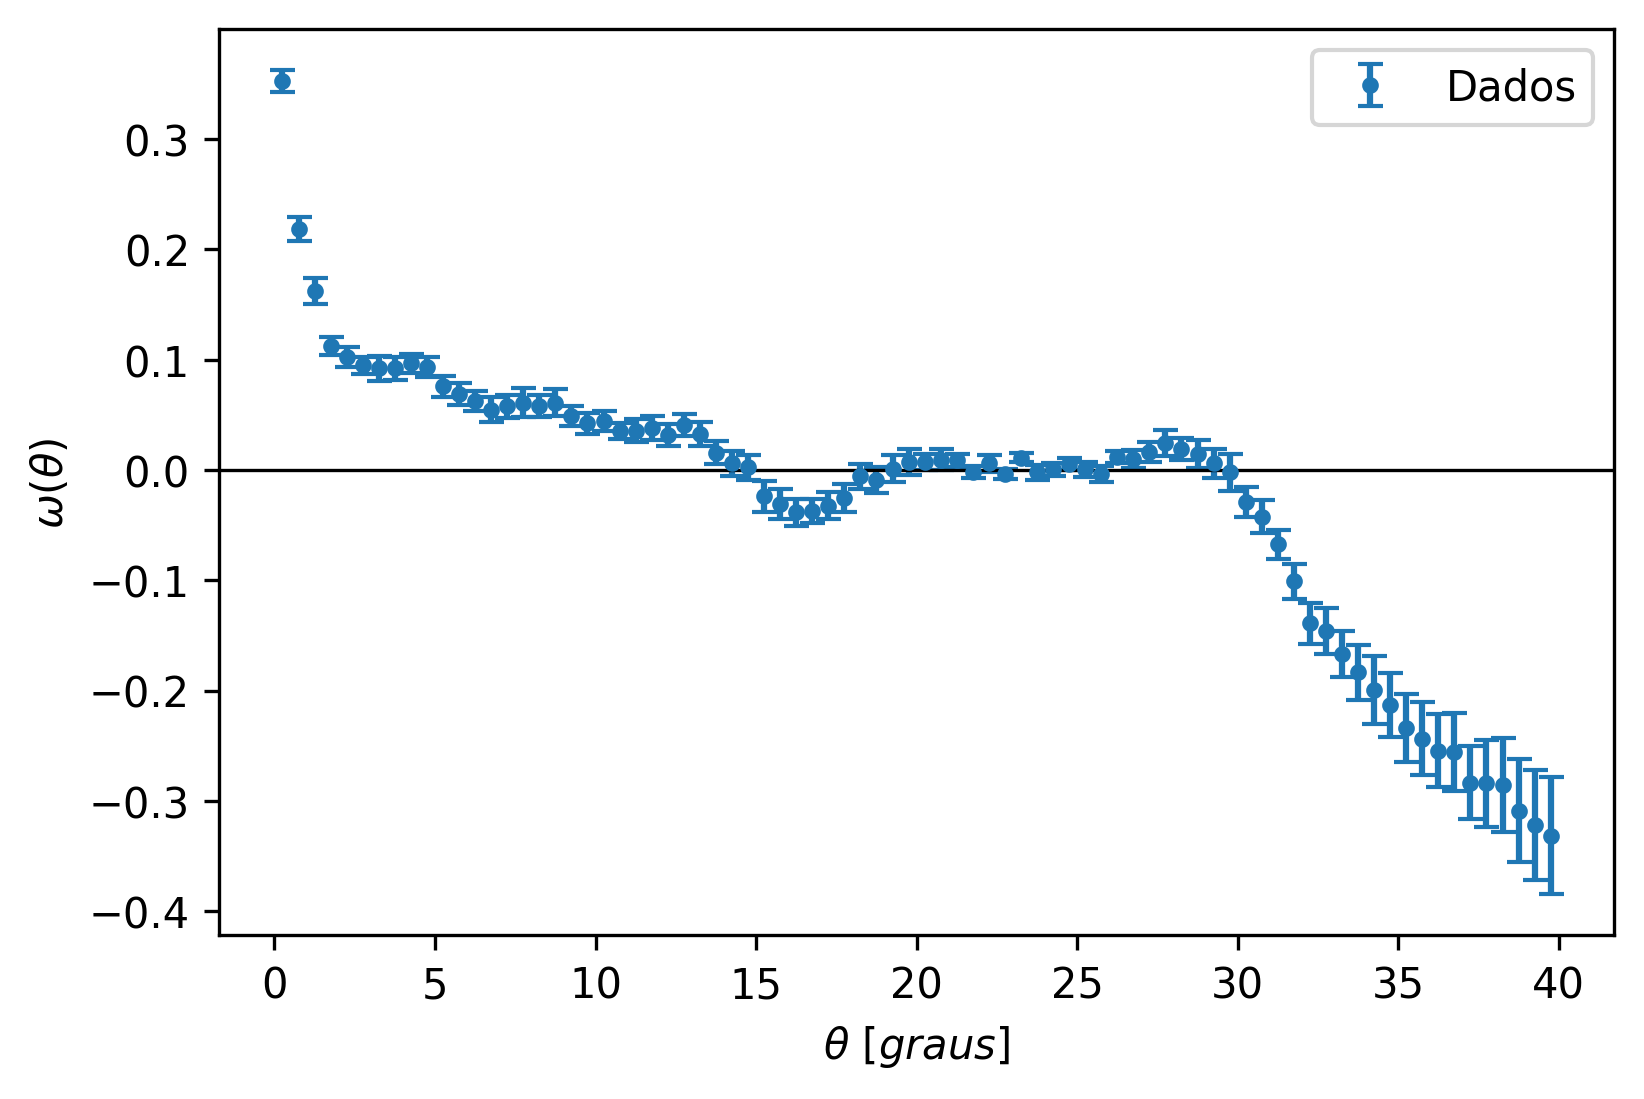

In [54]:
plt.figure(dpi=300)
plt.scatter(bin_center, omega_p, s=3)
plt.errorbar(bin_center, omega_p, yerr=std, fmt='o', capsize=3, markersize=3, label='Dados')
plt.xlabel('$\\theta \ [graus]$')
plt.ylabel('$\\omega(\\theta)$')
plt.legend(loc="upper right")
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.savefig('plot_tpacf.png', format='png')
plt.show()

In [50]:
#ver quanto tempo durou
end = time.time()
tempo = end - start

if int(tempo) >= 3600:
    print(f'Execução = {int(tempo) / 3600} hora(s)')
elif int(tempo) >= 60:
    print(f'Execução = {int(tempo) / 60} minuto(s)')
else:
    print(f'Execução = {int(tempo)} segundo(s)')

Execução = 13.3 minuto(s)


In [51]:
#diminuir a quantidade dados e assim observarmos melhor a lei de potência da função de correlação
b = 60
omega_b = omega_data.iloc[:, 0:b].values
omega_pb = np.mean(np.nan_to_num(omega_b), axis=0)
std_b = np.std(omega_b, axis=0)

center = list(hist_dd[1])
bin_centerb = []

for i in range(b):
    bin_centerb.append((center[i] + center[i + 1]) / 2)

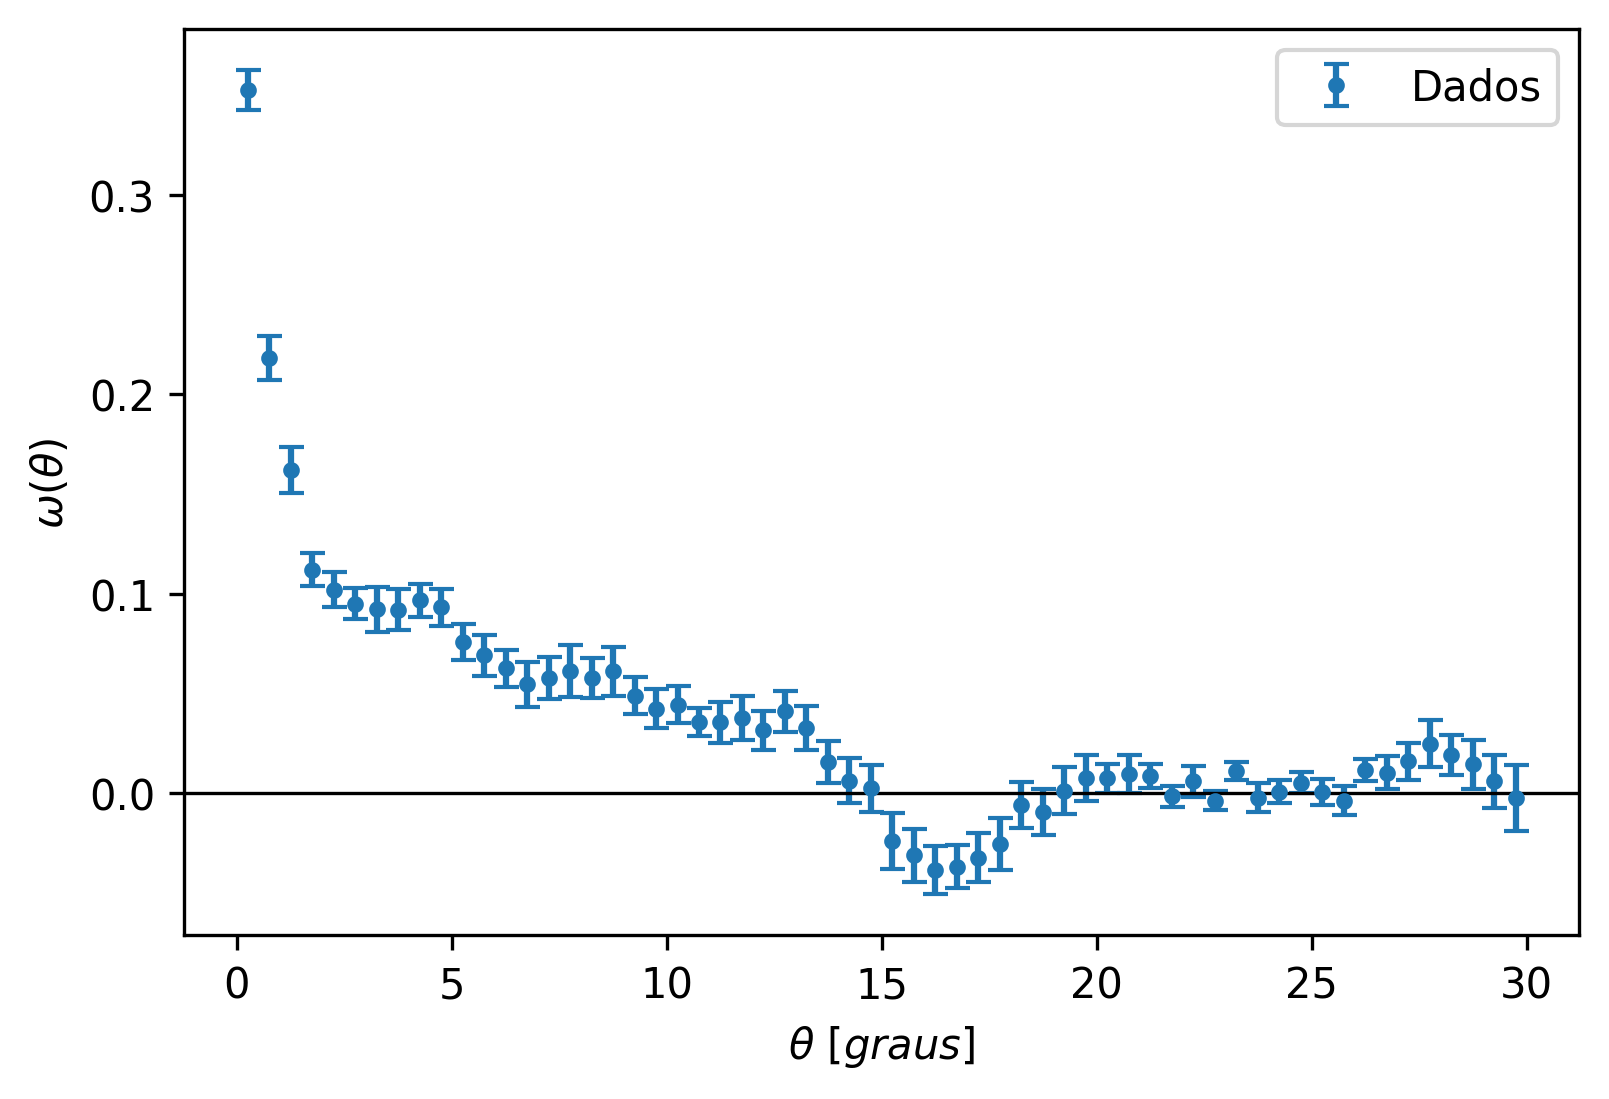

In [53]:
plt.figure(dpi=300)
plt.scatter(bin_centerb, omega_pb, s=3)
plt.errorbar(bin_centerb, omega_pb, yerr=std_b, fmt='o', capsize=3, markersize=3, label='Dados')
plt.xlabel('$\\theta \ [graus]$')
plt.ylabel('$\\omega(\\theta)$')
plt.legend(loc="upper right")
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.savefig('plot_tpacf.png', format='png')
plt.show()